## Final Project

- Full Name: Trương Tiến Anh

- Student ID: 22120017

---

In [11]:
#Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Đọc file csv
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tên sản phẩm                 1420 non-null   object
 1   Giá mới                      1404 non-null   object
 2   Giá cũ                       1420 non-null   object
 3   Màu sắc                      1188 non-null   object
 4   Các phiên bản bộ nhớ         1179 non-null   object
 5   Thời gian bảo hành           1420 non-null   object
 6   Thông số kỹ thuật            1420 non-null   object
 7   Đánh giá                     1420 non-null   object
 8   Số lượt đánh giá và hỏi đáp  1420 non-null   int64 
 9   Đường dẫn                    1420 non-null   object
dtypes: int64(1), object(9)
memory usage: 111.1+ KB


#### Câu hỏi 1: Mức giá giảm có ảnh hưởng đến lượt đánh giá và mức độ hài lòng của khách hàng không?

**Ý tưởng**
- Tính mức giảm giá = giá cũ - giá mới
- Tính trung bình `(Số lượt đánh giá và hỏi đáp)` theo sản phẩm `(Có giảm giá)`. Sau đó dùng các biểu đồ để trực quan hóa sự tương quan giữa `(Mức giảm giá)` và `(Số lượt đánh giá và hỏi đáp)`
- Đưa ra kết luận về Mức giảm giá có ảnh hưởng đến độ hài lòng của khách hàng

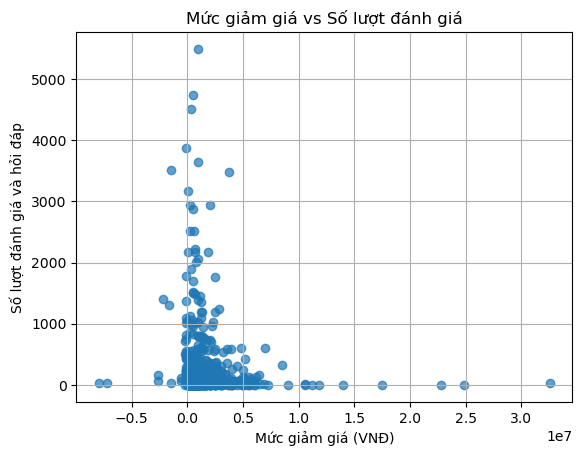

Hệ số tương quan: -0.0804094647622934


In [13]:
#Làm sách giá cũ và giá mới
def clean_price(price):
    price = str(price).replace('.', '').replace('đ', '').replace('₫', '').strip()  # Loại bỏ dấu chấm và chữ "đ"
    try:
        return float(price)
    except ValueError:
        return np.nan

data['Giá cũ'] = data['Giá cũ'].apply(clean_price)
data['Giá mới'] = data['Giá mới'].apply(clean_price)

# Tính toán mức giá giảm = Gía cũ - Gía mới
data['Mức giá giảm'] = data['Giá cũ'] - data['Giá mới']
data['Có giảm giá'] = data['Mức giá giảm'] > 0

#Tính trung bình lượt đánh giá theo sản phẩm có giảm giá
mean_rate = data.groupby('Có giảm giá')['Số lượt đánh giá và hỏi đáp'].mean()

# Vẽ biểu đồ phân tán: Mức giảm giá với Số lượt đánh giá
plt.scatter(data['Mức giá giảm'], data['Số lượt đánh giá và hỏi đáp'], alpha=0.7)
plt.title("Mức giảm giá vs Số lượt đánh giá")
plt.xlabel("Mức giảm giá (VNĐ)")
plt.ylabel("Số lượt đánh giá và hỏi đáp")
plt.grid(True)
plt.show()

#Hệ số tương quan
correlation = data['Mức giá giảm'].corr(data['Số lượt đánh giá và hỏi đáp'])
print(f'Hệ số tương quan: {correlation}')

**Kết luận**
- Mức giảm giá gần 0:
  - Dữ liệu tập trung phần lớn ở đây, tức nhiều sản phẩm có mức giảm giá rất thấp hoặc không giảm giá
  - Số lượng đánh giá tại đây vẫn rất đa dạng từ thấp tới cao
- Mức giảm giá (>1 triêu VNĐ):
  - Khi mức giảm giá tăng cao, số lượt đánh giá gảm dần, tức sản phẩm giảm giá lớn không thu hút nhiều lượt đánh giá
- Khu vực "Giảm giá âm":
  - Thể hiện trong dữ liệu có các sản phẩm không được giảm giá do đó `Giá cũ` - `Giá mới` < 0
- Hệ số tương quan giữa `Mức giảm giá` và `Số lượt đánh giá và hỏi đáp` là -0.0804, tức rất gần 0 :
  - Điều này cho thấy gần như không có mối quan hệ rõ rệt giữa mức giảm giá và số lượt đánh giá.
  - Giảm giá không đồng nghĩa với việc nhiều đánh giá nhiều hơn vì nó không thể hiện quan hệ tăng tuyến tính hay tỷ lệ thuận giữa `Mức giảm giá` và `Số lượt đánh giá và hỏi đáp`
  - Giảm giá không nhất thiết nhận được nhiều lượt đánh giá hơn

---

#### Câu hỏi 2: Thời gian bảo hành có ảnh hưởng đến sự hài lòng của khách hàng không?

**Ý tưởng**
- Ta sẽ chuẩn hóa `(Thời gian bảo hành)` và `(Đánh giá)` về dạng chuẩn để thực hiện tính toán bằng các hàm `clean_warranty`, `clean_rating`
- Tính trung bình `(Đánh giá)` theo `(Thời gian bảo hành (tháng))`. Sau đó dùng các biểu đồ để trực quan hóa sự tương quan giữa `(Thời gian bảo hành)` và `(Đánh giá)`
- Đưa ra kết luận về Thời gian bảo hành có ảnh hưởng đến độ hài lòng của khách hàng

In [14]:
# Hàm chuẩn hóa thời gian bảo hành
def clean_warranty(warranty):
    warranty = warranty.strip().lower()
    if "không có thông tin" in warranty:
        return np.nan
    
    # Trường hợp "12 + 12 tháng", "12+1 tháng"..vv
    if "+" in warranty:
        parts = warranty.split("+")
        try:
            total_months = int(parts[0].split().pop()) + int(parts[1].split()[0])  # Cộng các phần tháng lại
            return total_months
        except:
            return np.nan
    
    #Trường hợp "6 - 12 tháng" (dải thời gian)
    if "-" in warranty:
        parts = warranty.split("-")
        try:
            avg_months = (int(parts[0].split().pop()) + int(parts[1].split()[0]))/ 2  # Tính giá trị trung bình
            return avg_months
        except:
            return np.nan
    
    #Trường hợp 12 tháng
    if "tháng" in warranty:
        words = warranty.split()
        if len(words) > 0 and words[2].isdigit():
            return int(words[2]) 
    
    return np.nan

# Hàm chuẩn hóa đánh giá
def clean_rating(rate):
    try:
        numeric_part = rate.split("/")[0]
        return float(numeric_part)
    except:
        return np.nan 

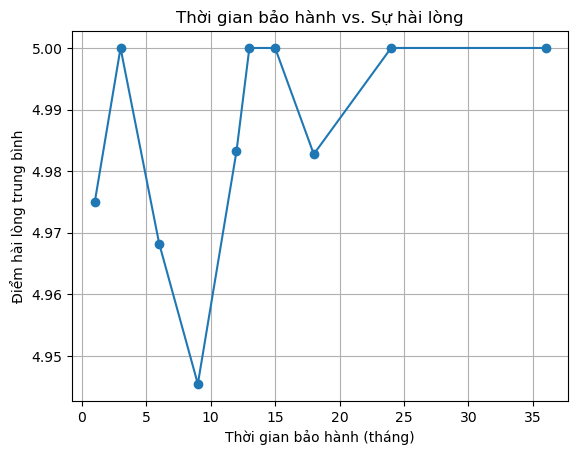

Hệ số tương quan: 0.05572484687261518


In [15]:
data['Thời gian bảo hành (tháng)'] = data['Thời gian bảo hành'].apply(clean_warranty)

data['Đánh giá'] = data['Đánh giá'].apply(clean_rating)

# Loại bỏ các giá trị NaN trong cột 'Thời gian bảo hành (tháng)' và 'Đánh giá'
data = data.dropna(subset=['Thời gian bảo hành (tháng)', 'Đánh giá'])

# Tính trung bình đánh giá theo 'Thời gian bảo hành (tháng)'
mean_satisfaction = data.groupby('Thời gian bảo hành (tháng)')['Đánh giá'].mean()

plt.plot(mean_satisfaction.index, mean_satisfaction.values, marker='o')
plt.title('Thời gian bảo hành vs. Sự hài lòng')
plt.xlabel('Thời gian bảo hành (tháng)')
plt.ylabel('Điểm hài lòng trung bình')
plt.grid(True)
plt.show()

correlation = data['Thời gian bảo hành (tháng)'].corr(data['Đánh giá'])
print(f'Hệ số tương quan: {correlation}')

**Kết luận**
- Từ biểu đồ trên ta có thể thấy được:
  - Bảo hành ngắn (dưới 10 tháng) thường dẫn đến sự không hài lòng
  - Thời gian bảo hành dài (trên 20 tháng): Điểm hài lòng tăng dần và ổn định gần mức tối đa (5.0), cho thấy thời gian bảo hành dài có tác động tích cực đến mức độ hài lòng.
  - Giảm đột ngột tại một số thời điểm: Tại mốc 5 và 15 tháng, điểm hài lòng giảm xuống mức thấp (dưới 4.97). Điều này có thể phản ánh rằng thời gian bảo hành không đủ dài để thỏa mãn khách hàng.
- Hệ số tương quan giữa `Thời gian bảo hành (tháng)` và `Đánh giá` là 0.0557, tức gần bằng 0:
  - Điều này cho thấy mối quan hệ giữa thời gian bảo hành và mức độ hài lòng (điểm đánh giá) rất yếu hoặc gần như không có sự tương quan.
  - Mặc dù biểu đồ cho thấy có một số mốc thời gian bảo hành dài nhận được điểm hài lòng cao, nhưng về tổng thể, thời gian bảo hành không phải là yếu tố chính quyết định sự hài lòng.